In [16]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


import logging
logging.basicConfig(level=logging.INFO)

In [17]:
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100) 

Features:
    - mean finishing position of driver: -> untill that race DONE -
    - mean finishing position of driver per circuit: -> untill that race DONE
    - last result --> groupby driver and shift(-1) for the positionOrder: DONE
   
    - mean result last 5 races: DONE 

    - how many wins at that circuit: be careful with data leakage --> amount of wins before that race DONE
    - how many poles at that circuit: DONE
    - amount of total wins untill that race: DONE
    - amount of poles untill that race: DONE
    - amount of total podiums untill that race: DONE
    - how many podiums at that circuit: DONE
    - total amount of races per driver: cumulative: DONE
    - wins this year: DONE
    
    
    - age in year: DONE
    - amount of years in F1 (how many seasons) untill that race / year: DONE
    - amount of DNFs by own fault of last 5 races --> see status: DONE
    
    - championship result last year: could make a dictionary of the last race WC standings per year and driver
    - amount of championships: DONE (WRONG!! het moet cumulatief zijn. Dus hamilton had in 2014 nog maar 1 WC en niet 4 zoals het eind 2017 was, nu is het vorm van data leakage)
    
    --> Maak een feature: worldchampion (Ja of Nee) en tel deze door. Groupby year
    
    
    - current WC standing: DONE
    
    
    - the team
    - How many years with the same team: if team == team shift(1) 
    

For training, drop all the riders their first 5 races?

In [18]:
from formula1 import preprocessing
from formula1.preprocessing import get_clean_df
from formula1.models.models_utils_GS_groupkfold import group_split_data
#from formula1.db import

In [19]:
work_df = (
    preprocessing.read_data()
    .pipe(preprocessing.merge_constructors)
    .pipe(preprocessing.merge_drivers)
    .pipe(preprocessing.merge_races)
    .pipe(preprocessing.merge_status)
    .pipe(preprocessing.merge_driverstandings)
    .pipe(preprocessing.remove_columns)
    .pipe(preprocessing.rename_columns)
    .pipe(preprocessing.sort_races)
    .pipe(preprocessing.average_finishing)
    .pipe(preprocessing.average_finishing_percircuit)
    .pipe(preprocessing.result_previous_race)
    .pipe(preprocessing.mean_last_5races)
    .pipe(preprocessing.get_wins)
    .pipe(preprocessing.get_wins_per_circuit)
    .pipe(preprocessing.get_poles)
    .pipe(preprocessing.get_poles_per_circuit)
    .pipe(preprocessing.get_total_wins)
    .pipe(preprocessing.current_wins_inyear)
    .pipe(preprocessing.get_total_poles)
    .pipe(preprocessing.get_podiums)
    .pipe(preprocessing.get_total_podiums)
    .pipe(preprocessing.get_podiums_per_circuit)
    .pipe(preprocessing.change_datetime)
    .pipe(preprocessing.get_driver_age)
    .pipe(preprocessing.get_career_years)
    .pipe(preprocessing.get_DNF)
    .pipe(preprocessing.get_DNF_last5races)
    .pipe(preprocessing.racecounter_per_driver)
    .pipe(preprocessing.last_race)
    .pipe(preprocessing.current_championshipstanding)
    #.pipe(preprocessing.get_WC)
    .pipe(preprocessing.remove_remaining_columns)
    .pipe(preprocessing.get_combinations)
    .pipe(preprocessing.filter_combinations)
    .pipe(preprocessing.new_race)
    .pipe(preprocessing.get_total_races)
    .pipe(preprocessing.get_winning_driver)
    .pipe(preprocessing.get_final_dataset)
    .pipe(preprocessing.fill_na_rows)
    .pipe(preprocessing.drop_na_rows)
)

INFO:formula1.utils:[read_data         ] shape=(23777, 18),  time=0:00:00.037590
INFO:formula1.utils:[merge_constructors] shape=(23777, 19),  time=0:00:00.016279
INFO:formula1.utils:[merge_drivers     ] shape=(23777, 27),  time=0:00:00.018469
INFO:formula1.utils:[merge_races       ] shape=(23777, 34),  time=0:00:00.016872
INFO:formula1.utils:[merge_status      ] shape=(23777, 35),  time=0:00:00.013327
INFO:formula1.utils:[merge_driverstandi] shape=(23777, 40),  time=0:00:00.038453
INFO:formula1.utils:[remove_columns    ] shape=(23777, 30),  time=0:00:00.017396
INFO:formula1.utils:[rename_columns    ] shape=(23777, 30),  time=0:00:00.006443
INFO:formula1.utils:[sort_races        ] shape=(23777, 30),  time=0:00:00.005907
INFO:formula1.utils:[average_finishing ] shape=(23777, 31),  time=0:00:00.492239
INFO:formula1.utils:[average_finishing_] shape=(23777, 32),  time=0:00:04.443587
INFO:formula1.utils:[result_previous_ra] shape=(23777, 33),  time=0:00:00.005100
INFO:formula1.utils:[mean_la

In [20]:
work_df

,constructorRef_left,year_left,mean_position_till_date_left,mean_position__percircuit_till_date_left,result_previous_race_left,mean_last5_races_left,win_per_circuit_left,poles_per_circuit_left,total_wins_left,wins_this_year_cumulative_left,total_poles_left,total_podiums_left,podium_per_circuit_left,current_age_years_left,career_years_left,dnf_last5_left,race_count_left,championship_standing_before_race_left,constructorRef_right,mean_position_till_date_right,mean_position__percircuit_till_date_right,result_previous_race_right,mean_last5_races_right,win_per_circuit_right,poles_per_circuit_right,total_wins_right,wins_this_year_cumulative_right,total_poles_right,total_podiums_right,podium_per_circuit_right,current_age_years_right,career_years_right,dnf_last5_right,race_count_right,championship_standing_before_race_right,new_race,total_races,leftwon
3957,alfa,1951,7.857143,12.000000,15.0,8.4,0.0,1.0,3.0,0.0,4.0,3.0,0.0,39.924160,1,3.0,8,2.0,alfa,4.166667,1.000000,1.0,4.8,1.0,0.0,3.0,0.0,2.0,3.0,1.0,44.573126,1,2.0,7,1.0,1,8,1
3963,alfa,1951,7.857143,12.000000,15.0,8.4,0.0,1.0,3.0,0.0,4.0,3.0,0.0,39.924160,1,3.0,8,2.0,ferrari,8.600000,17.000000,17.0,8.6,0.0,0.0,0.0,0.0,0.0,2.0,0.0,32.871312,1,2.0,6,5.0,0,8,1
3966,alfa,1951,7.857143,12.000000,15.0,8.4,0.0,1.0,3.0,0.0,4.0,3.0,0.0,39.924160,1,3.0,8,2.0,maserati,13.400000,9.000000,22.0,13.4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,1,3.0,6,10.0,0,8,1
3968,alfa,1951,7.857143,12.000000,15.0,8.4,0.0,1.0,3.0,0.0,4.0,3.0,0.0,39.924160,1,3.0,8,2.0,lago,6.571429,3.000000,4.0,5.6,0.0,0.0,0.0,0.0,0.0,2.0,1.0,45.556035,1,3.0,8,4.0,0,8,1
3970,alfa,1951,7.857143,12.000000,15.0,8.4,0.0,1.0,3.0,0.0,4.0,3.0,0.0,39.924160,1,3.0,8,2.0,lago,8.833333,13.000000,5.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1,5.0,7,18.0,0,8,1
3973,alfa,1951,7.857143,12.000000,15.0,8.4,0.0,1.0,3.0,0.0,4.0,3.0,0.0,39.924160,1,3.0,8,2.0,lago,10.500000,10.000000,16.0,10.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.790584,1,3.0,7,28.0,0,8,1
3977,alfa,1951,4.166667,1.000000,1.0,4.8,1.0,0.0,3.0,0.0,2.0,3.0,1.0,44.573126,1,2.0,7,1.0,alfa,7.857143,12.000000,15.0,8.4,0.0,1.0,3.0,0.0,4.0,3.0,0.0,39.924160,1,3.0,8,2.0,0,8,0
3984,alfa,1951,4.166667,1.000000,1.0,4.8,1.0,0.0,3.0,0.0,2.0,3.0,1.0,44.573126,1,2.0,7,1.0,ferrari,8.600000,17.000000,17.0,8.6,0.0,0.0,0.0,0.0,0.0,2.0,0.0,32.871312,1,2.0,6,5.0,0,8,1
3987,alfa,1951,4.166667,1.000000,1.0,4.8,1.0,0.0,3.0,0.0,2.0,3.0,1.0,44.573126,1,2.0,7,1.0,maserati,13.400000,9.000000,22.0,13.4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,1,3.0,6,10.0,0,8,1
3989,alfa,1951,4.166667,1.000000,1.0,4.8,1.0,0.0,3.0,0.0,2.0,3.0,1.0,44.573126,1,2.0,7,1.0,lago,6.571429,3.000000,4.0,5.6,0.0,0.0,0.0,0.0,0.0,2.0,1.0,45.556035,1,3.0,8,4.0,0,8,1


In [20]:
from formula1.db import retrieve_prediction_data, retrieve_race_data
from formula1.db import db_connection

In [44]:
#db_conn = db_connection()

In [18]:
test = retrieve_race_data('hamilton', 'vettel', 'Hungarian Grand Prix', 2017)

[('mercedes', 'hamilton', 2017, 'Hungarian Grand Prix', 5.6313131313131315, 4.3, 1.0, 3.6, 5.0, 5.0, 57.0, 4.0, 67.0, 110.0, 6.0, 32.559190127107335, 10, 0.0, 199, 2.0, 'ferrari', 'vettel', 6.164021164021164, 7.7, 7.0, 3.6, 1.0, 2.0, 45.0, 3.0, 47.0, 93.0, 4.0, 30.075908471768756, 10, 0.0, 190, 1.0, 0, 967, 0)]


In [21]:
df = retrieve_prediction_data('hamilton', 'vettel', 'Hungarian Grand Prix', 2017)

In [24]:
df['driverRef_left'][0]

'hamilton'

In [398]:
work_df[(work_df['driverRef'] =='hamilton') & (work_df['last_race'] == False)]

KeyError: 'driverRef'

In [385]:
work_df[(work_df['year'] == 2007) &(work_df['last_race']==True)]

,raceId,driverId,constructorId,grid,position,positionOrder,constructorRef,driverRef,year,circuitId,name,date,WC_points_thisyear,championship_standing,wins_this_year,mean_position_till_date,mean_position__percircuit_till_date,result_previous_race,mean_last5_races,win,win_per_circuit,pole,poles_per_circuit,total_wins,wins_this_year_cumulative,total_poles,podium,total_podiums,podium_per_circuit,current_age_years,career_years,dnf,dnf_last5,race_count,last_race,championship_standing_before_race
335,52,4,1,4,3.0,3,mclaren,alonso,2007,18,Brazilian Grand Prix,2007-10-21,109.0,3.0,4.0,7.028846,6.200000,2.0,6.0,False,0,False,1,19,4.0,17,True,48,3,26.229149,6,False,1.0,105,True,2.0
336,52,8,6,3,1.0,1,ferrari,raikkonen,2007,18,Brazilian Grand Prix,2007-10-21,110.0,1.0,6.0,8.363636,5.833333,1.0,2.0,True,0,False,0,14,5.0,14,True,47,3,28.011527,6,False,0.0,122,True,3.0
337,52,2,2,6,6.0,6,bmw_sauber,heidfeld,2007,18,Brazilian Grand Prix,2007-10-21,61.0,5.0,0.0,11.166667,15.333333,7.0,6.8,False,0,False,0,0,0.0,1,False,7,1,30.448264,7,False,1.0,133,True,5.0
338,52,9,2,7,5.0,5,bmw_sauber,kubica,2007,18,Brazilian Grand Prix,2007-10-21,39.0,6.0,0.0,9.761905,9.000000,18.0,9.4,False,0,False,0,0,0.0,0,False,1,0,22.869737,1,False,1.0,22,True,6.0
339,52,3,3,10,4.0,4,williams,rosberg,2007,18,Brazilian Grand Prix,2007-10-21,20.0,9.0,0.0,13.264706,22.000000,16.0,10.6,False,0,False,0,0,0.0,0,False,0,0,22.316680,1,False,1.0,35,True,9.0
340,52,13,6,1,2.0,2,ferrari,massa,2007,18,Brazilian Grand Prix,2007-10-21,94.0,4.0,3.0,9.103448,9.000000,3.0,6.6,False,1,True,1,5,3.0,8,True,16,1,26.489250,5,False,1.0,88,True,4.0
6027,52,18,11,16,NaN,19,honda,button,2007,18,Brazilian Grand Prix,2007-10-21,6.0,15.0,0.0,10.066176,8.857143,5.0,11.0,False,0,False,0,1,0.0,3,False,15,1,27.754163,7,True,2.0,137,True,15.0
6028,52,22,11,11,NaN,16,honda,barrichello,2007,18,Brazilian Grand Prix,2007-10-21,0.0,20.0,0.0,10.031746,13.357143,15.0,13.0,False,0,False,2,9,0.0,13,False,61,1,35.412089,14,True,0.0,253,True,20.0
8034,52,21,4,12,NaN,22,renault,fisichella,2007,18,Brazilian Grand Prix,2007-10-21,21.0,8.0,0.0,10.343590,8.000000,11.0,11.8,False,1,False,0,3,0.0,3,False,18,2,34.765943,11,True,1.0,196,True,8.0
8035,52,29,12,22,NaN,21,spyker,yamamoto,2007,18,Brazilian Grand Prix,2007-10-21,0.0,24.0,0.0,18.230769,16.000000,17.0,17.2,False,0,False,0,0,0.0,0,False,0,0,25.284571,1,True,0.0,14,True,23.0


In [384]:
work_df[(work_df['last_race']==True) & (work_df['year']==2007)]

,raceId,driverId,constructorId,grid,position,positionOrder,constructorRef,driverRef,year,circuitId,name,date,WC_points_thisyear,championship_standing,wins_this_year,mean_position_till_date,mean_position__percircuit_till_date,result_previous_race,mean_last5_races,win,win_per_circuit,pole,poles_per_circuit,total_wins,wins_this_year_cumulative,total_poles,podium,total_podiums,podium_per_circuit,current_age_years,career_years,dnf,dnf_last5,race_count,last_race,championship_standing_before_race
335,52,4,1,4,3.0,3,mclaren,alonso,2007,18,Brazilian Grand Prix,2007-10-21,109.0,3.0,4.0,7.028846,6.200000,2.0,6.0,False,0,False,1,19,4.0,17,True,48,3,26.229149,6,False,1.0,105,True,2.0
336,52,8,6,3,1.0,1,ferrari,raikkonen,2007,18,Brazilian Grand Prix,2007-10-21,110.0,1.0,6.0,8.363636,5.833333,1.0,2.0,True,0,False,0,14,5.0,14,True,47,3,28.011527,6,False,0.0,122,True,3.0
337,52,2,2,6,6.0,6,bmw_sauber,heidfeld,2007,18,Brazilian Grand Prix,2007-10-21,61.0,5.0,0.0,11.166667,15.333333,7.0,6.8,False,0,False,0,0,0.0,1,False,7,1,30.448264,7,False,1.0,133,True,5.0
338,52,9,2,7,5.0,5,bmw_sauber,kubica,2007,18,Brazilian Grand Prix,2007-10-21,39.0,6.0,0.0,9.761905,9.000000,18.0,9.4,False,0,False,0,0,0.0,0,False,1,0,22.869737,1,False,1.0,22,True,6.0
339,52,3,3,10,4.0,4,williams,rosberg,2007,18,Brazilian Grand Prix,2007-10-21,20.0,9.0,0.0,13.264706,22.000000,16.0,10.6,False,0,False,0,0,0.0,0,False,0,0,22.316680,1,False,1.0,35,True,9.0
340,52,13,6,1,2.0,2,ferrari,massa,2007,18,Brazilian Grand Prix,2007-10-21,94.0,4.0,3.0,9.103448,9.000000,3.0,6.6,False,1,True,1,5,3.0,8,True,16,1,26.489250,5,False,1.0,88,True,4.0
6027,52,18,11,16,NaN,19,honda,button,2007,18,Brazilian Grand Prix,2007-10-21,6.0,15.0,0.0,10.066176,8.857143,5.0,11.0,False,0,False,0,1,0.0,3,False,15,1,27.754163,7,True,2.0,137,True,15.0
6028,52,22,11,11,NaN,16,honda,barrichello,2007,18,Brazilian Grand Prix,2007-10-21,0.0,20.0,0.0,10.031746,13.357143,15.0,13.0,False,0,False,2,9,0.0,13,False,61,1,35.412089,14,True,0.0,253,True,20.0
8034,52,21,4,12,NaN,22,renault,fisichella,2007,18,Brazilian Grand Prix,2007-10-21,21.0,8.0,0.0,10.343590,8.000000,11.0,11.8,False,1,False,0,3,0.0,3,False,18,2,34.765943,11,True,1.0,196,True,8.0
8035,52,29,12,22,NaN,21,spyker,yamamoto,2007,18,Brazilian Grand Prix,2007-10-21,0.0,24.0,0.0,18.230769,16.000000,17.0,17.2,False,0,False,0,0,0.0,0,False,0,0,25.284571,1,True,0.0,14,True,23.0


In [5]:
from formula1.models import LR
from formula1.models import RF
from formula1.models import XGBoost

In [6]:
from formula1.models.models_utils import run
from formula1.models.models_utils import split_data

In [7]:
run(LR, work_df)

/Users/nhoogeveenxccelerated.com/Desktop/Projects/formula1/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


accuracy 0.6763384849398023
f1_score 0.6763384849398023


In [8]:
run(RF, work_df)

/Users/nhoogeveenxccelerated.com/Desktop/Projects/formula1/venv/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy 0.7071763743596367
f1_score 0.7071763743596368


In [9]:
run(XGBoost, work_df)

accuracy 0.6796676568083
f1_score 0.6796676568083


In [14]:
from formula1.models.models_utils_GS import run

In [23]:
from formula1.models.models_utils_GS_groupkfold import run

In [24]:
run()

INFO:formula1.utils:[read_data         ] shape=(23777, 18),  time=0:00:00.040959
INFO:formula1.utils:[merge_constructors] shape=(23777, 19),  time=0:00:00.017166
INFO:formula1.utils:[merge_drivers     ] shape=(23777, 27),  time=0:00:00.019490
INFO:formula1.utils:[merge_races       ] shape=(23777, 34),  time=0:00:00.017604
INFO:formula1.utils:[merge_status      ] shape=(23777, 35),  time=0:00:00.013946
INFO:formula1.utils:[merge_driverstandi] shape=(23777, 40),  time=0:00:00.040652
INFO:formula1.utils:[remove_columns    ] shape=(23777, 30),  time=0:00:00.018090
INFO:formula1.utils:[rename_columns    ] shape=(23777, 30),  time=0:00:00.005893
INFO:formula1.utils:[sort_races        ] shape=(23777, 30),  time=0:00:00.005935
INFO:formula1.utils:[average_finishing ] shape=(23777, 31),  time=0:00:00.530684
INFO:formula1.utils:[average_finishing_] shape=(23777, 32),  time=0:00:04.224929
INFO:formula1.utils:[result_previous_ra] shape=(23777, 33),  time=0:00:00.004645
INFO:formula1.utils:[mean_la

NameError: name 'correct_current_wins' is not defined

In [ ]:
# function to determine winner:
# if the driver and lefton == 0 and the returned sum is 0, then the driver is the winner. 
# If the sum is 1, the driver finished second. Sum is 2, the driver finished third.

In [63]:
# to drop for training set:
#     - driverId
#     - constructorId
#     - grid
#     - position
#     - positionOrder
#     - driverRef
#     - year
#     - circuitId
#     - name
#     - date

In [95]:
work_df[work_df['year_left'] == 2000]

,raceId,driverId_left,constructorId_left,grid_left,position_left,positionOrder_left,driverRef_left,year_left,circuitId_left,name_left,date_left,mean_position_till_date_left,mean_position__percircuit_till_date_left,result_previous_race_left,mean_last5_races_left,win_left,win_per_circuit_left,pole_left,poles_per_circuit_left,total_wins_left,total_poles_left,podium_left,total_podiums_left,podium_per_circuit_left,current_age_years_left,career_years_left,dnf_left,dnf_last5_left,driverId_right,constructorId_right,grid_right,position_right,positionOrder_right,driverRef_right,year_right,circuitId_right,name_right,date_right,mean_position_till_date_right,mean_position__percircuit_till_date_right,result_previous_race_right,mean_last5_races_right,win_right,win_per_circuit_right,pole_right,poles_per_circuit_right,total_wins_right,total_poles_right,podium_right,total_podiums_right,podium_per_circuit_right,current_age_years_right,career_years_right,dnf_right,dnf_last5_right,new_race,total_races,leftwon
449578,158,21,22,9,5.0,5,fisichella,2000,1,Australian Grand Prix,2000-03-12,10.456140,11.00,14.0,14.0,False,0.0,False,0.0,0.0,1.0,False,5.0,0.0,27.157300,4,False,3.0,22,6,4,2.0,2,barrichello,2000,1,Australian Grand Prix,2000-03-12,12.842105,13.250000,8.0,6.0,False,0.0,False,0.0,0.0,2.0,True,6.0,0.0,27.803446,7,False,0.0,1,647,0
449579,158,21,22,9,5.0,5,fisichella,2000,1,Australian Grand Prix,2000-03-12,10.456140,11.00,14.0,14.0,False,0.0,False,0.0,0.0,1.0,False,5.0,0.0,27.157300,4,False,3.0,23,3,11,3.0,3,ralf_schumacher,2000,1,Australian Grand Prix,2000-03-12,10.877551,13.333333,5.0,6.6,False,0.0,False,0.0,0.0,0.0,True,6.0,1.0,24.701397,3,False,1.0,0,647,0
449580,158,21,22,9,5.0,5,fisichella,2000,1,Australian Grand Prix,2000-03-12,10.456140,11.00,14.0,14.0,False,0.0,False,0.0,0.0,1.0,False,5.0,0.0,27.157300,4,False,3.0,25,22,14,7.0,7,wurz,2000,1,Australian Grand Prix,2000-03-12,10.771429,9.000000,10.0,14.4,False,0.0,False,0.0,0.0,0.0,False,1.0,0.0,26.070351,3,False,2.0,0,647,1
449581,158,21,22,9,5.0,5,fisichella,2000,1,Australian Grand Prix,2000-03-12,10.456140,11.00,14.0,14.0,False,0.0,False,0.0,0.0,1.0,False,5.0,0.0,27.157300,4,False,3.0,30,6,3,1.0,1,michael_schumacher,2000,1,Australian Grand Prix,2000-03-12,6.937500,10.000000,2.0,9.2,True,0.0,False,0.0,35.0,23.0,True,71.0,1.0,31.187499,9,False,2.0,0,647,0
449582,158,21,22,9,5.0,5,fisichella,2000,1,Australian Grand Prix,2000-03-12,10.456140,11.00,14.0,14.0,False,0.0,False,0.0,0.0,1.0,False,5.0,0.0,27.157300,4,False,3.0,35,16,8,4.0,4,villeneuve,2000,1,Australian Grand Prix,2000-03-12,8.600000,11.250000,9.0,10.8,False,0.0,False,2.0,11.0,13.0,False,21.0,1.0,28.925988,4,False,2.0,0,647,0
449583,158,21,22,9,5.0,5,fisichella,2000,1,Australian Grand Prix,2000-03-12,10.456140,11.00,14.0,14.0,False,0.0,False,0.0,0.0,1.0,False,5.0,0.0,27.157300,4,False,3.0,41,16,16,6.0,6,zonta,2000,1,Australian Grand Prix,2000-03-12,14.923077,9.000000,12.0,15.0,False,0.0,False,0.0,0.0,0.0,False,0.0,0.0,23.970376,1,False,3.0,0,647,1
449584,158,21,22,9,5.0,5,fisichella,2000,1,Australian Grand Prix,2000-03-12,10.456140,11.00,14.0,14.0,False,0.0,False,0.0,0.0,1.0,False,5.0,0.0,27.157300,4,False,3.0,48,18,18,8.0,8,gene,2000,1,Australian Grand Prix,2000-03-12,13.750000,13.000000,18.0,14.2,False,0.0,False,0.0,0.0,0.0,False,0.0,0.0,25.955358,1,False,2.0,0,647,1
449585,158,21,22,9,5.0,5,fisichella,2000,1,Australian Grand Prix,2000-03-12,10.456140,11.00,14.0,14.0,False,0.0,False,0.0,0.0,1.0,False,5.0,0.0,27.157300,4,False,3.0,14,1,2,NaN,19,coulthard,2000,1,Australian Grand Prix,2000-03-12,9.177778,9.250000,17.0,11.0,False,1.0,False,0.0,6.0,8.0,False,30.0,2.0,28.961580,6,True,3.0,0,647,1
449586,158,21,22,9,5.0,5,fisichella,2000,1,Australian Grand Prix,2000-03-12,10.456140,11.00,14.0,14.0,False,0.0,False,0.0,0.0,1.0,False,5.0,0.0,27.157300,4,False,3.0,15,17,6,NaN,15,trulli,2000,1,Australian Grand Prix,2000-03-12,13.217391,11.666667,21.0,14.6,False,0.0,False,0.0,0.0,0.0,False,1.0,0.0,25.665140,3,True,3.0,0,647,1
449587,158,21,22,

In [6]:
work_df[(work_df['driverId'] == 1) &(work_df['circuitId'] == 1)] 

,driverId,constructorId,grid,position,positionOrder,driverRef,year,circuitId,name,date,mean_position_till_date,mean_position__percircuit_till_date,result_previous_race,mean_last5_races,win,win_per_circuit,pole,poles_per_circuit,total_wins,total_poles,podium,total_podiums,podium_per_circuit,current_age_years,career_years,dnf,dnf_last5
194,1,1,4,3.0,3,hamilton,2007,1,Australian Grand Prix,2007-03-18,NaN,NaN,NaN,NaN,False,NaN,False,NaN,NaN,NaN,True,NaN,NaN,22.190736,0,False,NaN
0,1,1,1,1.0,1,hamilton,2008,1,Australian Grand Prix,2008-03-16,3.941176,3.000000,7.0,6.6,True,0,True,0,4,6,True,12,1,23.187334,1,False,1.0
14049,1,1,18,NaN,20,hamilton,2009,1,Australian Grand Prix,2009-03-29,4.600000,2.000000,5.0,5.6,False,1,False,1,9,13,False,22,2,24.222263,2,True,0.0
568,1,1,11,6.0,6,hamilton,2010,1,Australian Grand Prix,2010-03-28,6.207547,8.000000,3.0,5.8,False,1,False,1,11,17,False,28,2,25.218861,3,False,1.0
767,1,1,2,2.0,2,hamilton,2011,1,Australian Grand Prix,2011-03-27,6.309859,7.500000,2.0,6.4,False,1,False,1,14,18,True,36,2,26.215460,4,False,1.0
940,1,1,1,3.0,3,hamilton,2012,1,Australian Grand Prix,2012-03-18,6.400000,6.400000,22.0,7.4,False,1,True,1,17,19,True,42,3,27.192892,5,False,1.0
1213,1,131,3,5.0,5,hamilton,2013,1,Australian Grand Prix,2013-03-17,6.981818,5.833333,20.0,11.2,False,1,False,2,21,26,False,49,4,28.189491,6,False,2.0
9370,1,131,1,NaN,19,hamilton,2014,1,Australian Grand Prix,2014-03-16,6.829457,5.714286,9.0,9.2,False,1,True,2,22,31,False,54,4,29.186089,7,True,1.0
1657,1,131,1,1.0,1,hamilton,2015,1,Australian Grand Prix,2015-03-15,6.479730,7.375000,1.0,1.2,True,1,True,3,33,38,True,70,4,30.182687,8,False,0.0
1828,1,131,1,2.0,2,hamilton,2016,1,Australian Grand Prix,2016-03-20,6.035928,6.666667,2.0,1.6,False,2,True,4,43,49,True,87,5,31.198450,9,False,0.0


In [351]:
df_standings = pd.read_csv('../data/driverStandings.csv')

In [357]:
df_standings[df_standings['raceId'] == 39]

,driverStandingsId,raceId,driverId,points,position,positionText,wins
424,13692,39,14,4.0,9,9,0
425,13691,39,27,0.0,20,20,0
426,13690,39,9,8.0,6,6,0
427,13689,39,26,0.0,22,22,0
428,13688,39,25,0.0,14,14,0
429,13687,39,16,0.0,19,19,0
430,13686,39,19,0.0,17,17,0
431,13685,39,18,0.0,18,18,0
432,13684,39,24,0.0,21,21,0
433,13683,39,17,0.0,16,16,0


In [358]:
new_df = pd.merge(work_df, df_standings,  how='left', left_on=['raceId','driverId'], right_on = ['raceId','driverId'])

In [360]:
new_df[new_df['driverId'] == 1]

,raceId,driverId,constructorId,number_x,grid,position_x,positionText_x,positionOrder,points_x,laps,time_x,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,driverRef,dob,nationality,year,round,circuitId,name,date,status,mean_position_till_date,mean_position__percircuit_till_date,result_previous_race,mean_last5_races,win,win_per_circuit,pole,poles_per_circuit,total_wins,total_poles,podium,total_podiums,podium_per_circuit,current_age_days,current_age_years,career_years,dnf,dnf_last5,driverStandingsId,points_y,position_y,positionText_y,wins
19238,36,1,1,2.0,4,3.0,3,3,6.0,58,18.595,5147365.0,20.0,3.0,01:26.4,221.083,1,hamilton,1985-01-07,British,2007,1,1,Australian Grand Prix,2007-03-18,Finished,NaN,NaN,NaN,NaN,False,NaN,False,NaN,NaN,NaN,True,NaN,NaN,8105 days,22.190736,0,False,NaN,13615.0,6.0,3.0,3,0.0
19260,37,1,1,2.0,4,2.0,2,2,8.0,56,17.557,5552487.0,22.0,1.0,01:36.7,206.355,1,hamilton,1985-01-07,British,2007,2,2,Malaysian Grand Prix,2007-04-08,Finished,3.000000,NaN,3.0,NaN,False,NaN,False,NaN,0,0,True,1,NaN,8126 days,22.248232,0,False,NaN,13632.0,14.0,3.0,3,0.0
19282,38,1,1,2.0,2,2.0,2,2,8.0,57,2.36,5609875.0,18.0,2.0,01:34.3,206.674,1,hamilton,1985-01-07,British,2007,3,3,Bahrain Grand Prix,2007-04-15,Finished,2.500000,NaN,2.0,NaN,False,NaN,False,NaN,0,0,True,2,NaN,8133 days,22.267398,0,False,NaN,13652.0,22.0,3.0,3,0.0
19304,39,1,1,2.0,4,2.0,2,2,8.0,65,6.79,5503020.0,20.0,2.0,01:22.9,202.205,1,hamilton,1985-01-07,British,2007,4,4,Spanish Grand Prix,2007-05-13,Finished,2.333333,NaN,2.0,NaN,False,NaN,False,NaN,0,0,True,3,NaN,8161 days,22.344059,0,False,NaN,13673.0,30.0,1.0,1,0.0
19326,40,1,1,2.0,2,2.0,2,2,8.0,78,4.095,6033424.0,28.0,2.0,01:15.4,159.528,1,hamilton,1985-01-07,British,2007,5,6,Monaco Grand Prix,2007-05-27,Finished,2.250000,NaN,2.0,NaN,False,NaN,False,NaN,0,0,True,4,NaN,8175 days,22.382390,0,False,NaN,13695.0,38.0,2.0,2,0.0
19348,41,1,1,2.0,1,1.0,1,1,10.0,70,44:11.3,6251292.0,37.0,2.0,01:16.5,205.239,1,hamilton,1985-01-07,British,2007,6,7,Canadian Grand Prix,2007-06-10,Finished,2.200000,NaN,2.0,2.2,True,NaN,True,NaN,0,0,True,5,NaN,8189 days,22.420720,0,False,0.0,13717.0,48.0,1.0,1,1.0
19370,42,1,1,2.0,1,1.0,1,1,10.0,73,31:10.0,5469965.0,20.0,2.0,01:13.2,206.101,1,hamilton,1985-01-07,British,2007,7,19,United States Grand Prix,2007-06-17,Finished,2.000000,NaN,1.0,1.8,True,NaN,True,NaN,1,1,True,6,NaN,8196 days,22.439886,0,False,0.0,13739.0,58.0,1.0,1,2.0
19392,43,1,1,2.0,2,3.0,3,3,6.0,70,32.153,5486353.0,39.0,4.0,01:16.6,207.34,1,hamilton,1985-01-07,British,2007,8,8,French Grand Prix,2007-07-01,Finished,1.857143,NaN,1.0,1.6,False,NaN,False,NaN,2,2,True,7,NaN,8210 days,22.478217,0,False,0.0,13762.0,64.0,1.0,1,2.0
19414,44,1,1,2.0,1,3.0,3,3,6.0,59,39.373,4942447.0,11.0,4.0,01:21.7,226.6,1,hamilton,1985-01-07,British,2007,9,9,British Grand Prix,2007-07-08,Finished,2.000000,NaN,3.0,1.8,False,NaN,True,NaN,2,2,True,8,NaN,8217 days,22.497382,0,False,0.0,13785.0,70.0,1.0,1,2.0
19443,45,1,1,2.0,10,9.0,9,9,0.0,59,NaN,NaN,29.0,3.0,01:33.4,198.421,11,hamilton,1985-01-07,British,2007,10,20,European Grand Prix,2007-07-22,+1 Lap,2.111111,NaN,3.0,2.0,False,NaN,False,NaN,2,3,False,9,NaN,8231 days,22.535713,0,False,0.0,13808.0,70.0,1.0,1,2.0


In [410]:
from sklearn.model_selection import GroupKFold

# Average finishing position per driver untill that race

In [ ]:
# @log_step
# def mean_finish_position(df):
#     return df.assign(
#         mean_position = lambda df: df.groupby('driverId')['positionOrder']
#         .transform(lambda df: df.mean())
#     )


In [164]:
def average_finishing(df):
    return df.assign(
        mean_position_till_date = lambda df: df.groupby('driverId')['positionOrder']
        .transform(lambda df: df.shift(1).expanding().mean())
    )

In [165]:
x = mean_finishing_position(work_df)

In [166]:
x.head()

,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,laps,time_x,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,driverRef,dob,nationality,year,round,circuitId,name,status,mean_position,mean_pos_percircuit,result_previous_race,mean_last5_races,win,win_per_circuit,pole,poles_per_circuit,total_wins,total_poles
6002,833,642,51,2.0,1,1.0,1,1,9.0,70,13:23.6,8003600.0,NaN,NaN,NaN,NaN,1,farina,30/10/1906,Italian,1950,1,9,British Grand Prix,Finished,NaN,6.000000,NaN,NaN,True,NaN,True,NaN,NaN,NaN
6003,833,686,51,4.0,4,3.0,3,3,4.0,70,52,8055600.0,NaN,NaN,NaN,NaN,1,reg_parnell,02/07/1911,British,1950,1,9,British Grand Prix,Finished,NaN,9.500000,NaN,NaN,False,NaN,False,NaN,NaN,NaN
6004,833,786,51,3.0,2,2.0,2,2,6.0,70,2.6,8006200.0,NaN,NaN,NaN,NaN,1,fagioli,1898-06-09,Italian,1950,1,9,British Grand Prix,Finished,NaN,2.000000,NaN,NaN,False,NaN,False,NaN,NaN,NaN
11301,833,640,105,20.0,8,NaN,R,17,0.0,36,NaN,NaN,NaN,NaN,NaN,NaN,5,graffenried,18/05/1914,Swiss,1950,1,9,British Grand Prix,Engine,NaN,18.333333,NaN,NaN,False,NaN,False,NaN,NaN,NaN
11302,833,747,105,5.0,18,NaN,R,15,0.0,44,NaN,NaN,NaN,NaN,NaN,NaN,5,murray,28/12/1909,British,1950,1,9,British Grand Prix,Engine,NaN,20.333333,NaN,NaN,False,NaN,False,NaN,NaN,NaN


# How many wins at a circuit?

In [ ]:
# groupby driver and circuit and count if positionOrder == 1, sort first by year and sum the results.

In [123]:
def get_wins_per_circuit(df):
    return df.assign(
        win_per_circuit = lambda df: df.groupby(['driverId','circuitId'])['win']
        .transform(lambda df: df.shift(1).cumsum())   
    )

In [124]:
x1 = get_wins_per_circuit(work_df)

In [126]:
x1[(x1['driverId'] == 1) & (x1['circuitId'] == 6)]

,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,laps,time_x,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,driverRef,dob,nationality,year,round,circuitId,name,status,mean_position,mean_pos_percircuit,result_previous_race,mean_last5_races,win,win_per_circuit
227,40,1,1,2.0,2,2.0,2,2,8.0,78,4.095,6033424.0,28.0,2.0,01:15.4,159.528,1,hamilton,07/01/1985,British,2007,5,6,Monaco Grand Prix,Finished,5.485577,4.363636,2.0,NaN,False,NaN
46,23,1,1,22.0,3,1.0,1,1,10.0,76,00:42.7,7242742.0,71.0,6.0,01:18.5,153.152,1,hamilton,07/01/1985,British,2008,6,6,Monaco Grand Prix,Finished,5.485577,4.363636,2.0,4.8,True,0
6203,6,1,1,1.0,19,12.0,12,12,0.0,77,NaN,NaN,65.0,8.0,01:15.7,158.824,11,hamilton,07/01/1985,British,2009,6,6,Monaco Grand Prix,+1 Lap,5.485577,4.363636,9.0,9.2,False,1
612,342,1,1,2.0,5,5.0,5,5,10.0,78,4.363,6617718.0,68.0,10.0,01:16.2,157.755,1,hamilton,07/01/1985,British,2010,6,6,Monaco Grand Prix,Finished,5.485577,4.363636,14.0,6.2,False,1
814,846,1,1,3.0,9,6.0,6,6,8.0,78,27.21,7805583.0,54.0,5.0,01:17.8,154.456,1,hamilton,07/01/1985,British,2011,6,6,Monaco Grand Prix,Finished,5.485577,4.363636,2.0,3.4,False,1
1007,865,1,1,4.0,3,5.0,5,5,10.0,78,4.101,6370658.0,46.0,4.0,01:18.8,152.577,1,hamilton,07/01/1985,British,2012,6,6,Monaco Grand Prix,Finished,5.485577,4.363636,8.0,5.0,False,1
1274,885,1,131,10.0,2,4.0,4,4,12.0,78,13.894,8285950.0,76.0,3.0,01:18.1,153.891,1,hamilton,07/01/1985,British,2013,6,6,Monaco Grand Prix,Finished,5.485577,4.363636,12.0,5.6,False,1
1505,905,1,131,44.0,2,2.0,2,2,18.0,78,9.21,6576871.0,34.0,3.0,01:19.4,151.51,1,hamilton,07/01/1985,British,2014,6,6,Monaco Grand Prix,Finished,5.485577,4.363636,1.0,4.6,False,1
1691,931,1,131,44.0,1,3.0,3,3,15.0,78,6.053,6564473.0,42.0,3.0,01:18.7,152.692,1,hamilton,07/01/1985,British,2015,6,6,Monaco Grand Prix,Finished,5.485577,4.363636,2.0,1.4,False,1
1873,953,1,131,44.0,3,1.0,1,1,25.0,78,59:29.1,7169133.0,71.0,1.0,01:17.9,154.135,1,hamilton,07/01/1985,British,2016,6,6,Monaco Grand Prix,Finished,5.485577,4.363636,21.0,7.0,True,1


# How many poles at a circuit?

In [ ]:
def get_poles(df):
    return df.assign(
        pole = lambda df: df['grid'] == 1
    )

In [ ]:
def get_poles_per_circuit(df):
    return df.assign(
        poles_per_circuit = lambda df: df.groupby(['driverId','circuitId'])['pole']
        .transform(lambda df: df.shift(1).cumsum())   
    )

# Total wins untill that race

In [140]:
def get_total_wins(df):
    return df.assign(
        total_wins = lambda df: df.groupby('driverId')['win']
        .transform(lambda df: df.shift(1).cumsum())
    )

In [141]:
x = get_total_wins(work_df)

In [142]:
x[(x['driverId'] == 1) & (x['year'] == 2016)]

,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,laps,time_x,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,driverRef,dob,nationality,year,round,circuitId,name,status,mean_position,mean_pos_percircuit,result_previous_race,mean_last5_races,win,win_per_circuit,pole,poles_per_circuit,total_wins
1828,948,1,131,44.0,1,2.0,2,2,18.0,57,8.06,6503625.0,48.0,4.0,01:30.6,210.608,1,hamilton,07/01/1985,British,2016,1,1,Australian Grand Prix,Finished,5.485577,5.818182,2.0,1.6,False,2,True,4,43
1841,949,1,131,44.0,1,3.0,3,3,15.0,57,30.148,5644844.0,43.0,2.0,01:34.7,205.785,1,hamilton,07/01/1985,British,2016,2,3,Bahrain Grand Prix,Finished,5.485577,4.200000,2.0,1.8,False,2,True,1,43
1847,950,1,131,44.0,22,7.0,7,7,6.0,56,+1:18.230,6012121.0,32.0,10.0,01:40.7,194.945,1,hamilton,07/01/1985,British,2016,3,17,Chinese Grand Prix,Finished,5.485577,4.090909,3.0,2.2,False,4,False,5,43
1860,951,1,131,44.0,10,2.0,2,2,18.0,53,25.022,5587019.0,36.0,4.0,01:40.3,209.969,1,hamilton,07/01/1985,British,2016,4,71,Russian Grand Prix,Finished,5.485577,2.000000,7.0,3.2,False,2,False,1,43
11485,952,1,131,44.0,1,NaN,R,21,0.0,0,NaN,NaN,NaN,0.0,NaN,NaN,4,hamilton,07/01/1985,British,2016,5,4,Spanish Grand Prix,Collision,5.485577,6.818182,2.0,3.2,False,1,True,1,43
1873,953,1,131,44.0,3,1.0,1,1,25.0,78,59:29.1,7169133.0,71.0,1.0,01:17.9,154.135,1,hamilton,07/01/1985,British,2016,6,6,Monaco Grand Prix,Finished,5.485577,4.363636,21.0,7.0,True,1,False,1,43
1880,954,1,131,44.0,1,1.0,1,1,25.0,70,31:05.3,5465296.0,68.0,2.0,01:16.0,206.625,1,hamilton,07/01/1985,British,2016,7,7,Canadian Grand Prix,Finished,5.485577,6.900000,1.0,6.8,True,4,True,4,44
1887,955,1,131,44.0,10,5.0,5,5,10.0,51,56.335,5628701.0,42.0,2.0,01:46.8,202.306,1,hamilton,07/01/1985,British,2016,8,73,European Grand Prix,Finished,5.485577,5.000000,1.0,6.4,False,NaN,False,NaN,45
1898,956,1,131,44.0,1,1.0,1,1,25.0,71,27:38.1,5258107.0,67.0,1.0,01:08.4,227.647,1,hamilton,07/01/1985,British,2016,9,70,Austrian Grand Prix,Finished,5.485577,2.250000,5.0,6.0,True,0,True,1,45
1906,957,1,131,44.0,1,1.0,1,1,25.0,52,34:55.8,5695831.0,45.0,3.0,01:35.8,221.44,1,hamilton,07/01/1985,British,2016,10,9,British Grand Prix,Finished,5.485577,3.818182,1.0,5.8,True,3,True,3,46


# Total poles untill that race

In [146]:
def get_total_poles(df):
    return df.assign(
        total_poles = lambda df: df.groupby('driverId')['pole']
        .transform(lambda df: df.shift(1).cumsum())
    )

In [147]:
x = get_total_poles(work_df)

In [148]:
x[(x['driverId'] == 1) & (x['year'] == 2016)]

,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,laps,time_x,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,driverRef,dob,nationality,year,round,circuitId,name,status,mean_position,mean_pos_percircuit,result_previous_race,mean_last5_races,win,win_per_circuit,pole,poles_per_circuit,total_wins,total_poles
1828,948,1,131,44.0,1,2.0,2,2,18.0,57,8.06,6503625.0,48.0,4.0,01:30.6,210.608,1,hamilton,07/01/1985,British,2016,1,1,Australian Grand Prix,Finished,5.485577,5.818182,2.0,1.6,False,2,True,4,43,49
1841,949,1,131,44.0,1,3.0,3,3,15.0,57,30.148,5644844.0,43.0,2.0,01:34.7,205.785,1,hamilton,07/01/1985,British,2016,2,3,Bahrain Grand Prix,Finished,5.485577,4.200000,2.0,1.8,False,2,True,1,43,50
1847,950,1,131,44.0,22,7.0,7,7,6.0,56,+1:18.230,6012121.0,32.0,10.0,01:40.7,194.945,1,hamilton,07/01/1985,British,2016,3,17,Chinese Grand Prix,Finished,5.485577,4.090909,3.0,2.2,False,4,False,5,43,51
1860,951,1,131,44.0,10,2.0,2,2,18.0,53,25.022,5587019.0,36.0,4.0,01:40.3,209.969,1,hamilton,07/01/1985,British,2016,4,71,Russian Grand Prix,Finished,5.485577,2.000000,7.0,3.2,False,2,False,1,43,51
11485,952,1,131,44.0,1,NaN,R,21,0.0,0,NaN,NaN,NaN,0.0,NaN,NaN,4,hamilton,07/01/1985,British,2016,5,4,Spanish Grand Prix,Collision,5.485577,6.818182,2.0,3.2,False,1,True,1,43,51
1873,953,1,131,44.0,3,1.0,1,1,25.0,78,59:29.1,7169133.0,71.0,1.0,01:17.9,154.135,1,hamilton,07/01/1985,British,2016,6,6,Monaco Grand Prix,Finished,5.485577,4.363636,21.0,7.0,True,1,False,1,43,52
1880,954,1,131,44.0,1,1.0,1,1,25.0,70,31:05.3,5465296.0,68.0,2.0,01:16.0,206.625,1,hamilton,07/01/1985,British,2016,7,7,Canadian Grand Prix,Finished,5.485577,6.900000,1.0,6.8,True,4,True,4,44,52
1887,955,1,131,44.0,10,5.0,5,5,10.0,51,56.335,5628701.0,42.0,2.0,01:46.8,202.306,1,hamilton,07/01/1985,British,2016,8,73,European Grand Prix,Finished,5.485577,5.000000,1.0,6.4,False,NaN,False,NaN,45,53
1898,956,1,131,44.0,1,1.0,1,1,25.0,71,27:38.1,5258107.0,67.0,1.0,01:08.4,227.647,1,hamilton,07/01/1985,British,2016,9,70,Austrian Grand Prix,Finished,5.485577,2.250000,5.0,6.0,True,0,True,1,45,53
1906,957,1,131,44.0,1,1.0,1,1,25.0,52,34:55.8,5695831.0,45.0,3.0,01:35.8,221.44,1,hamilton,07/01/1985,British,2016,10,9,British Grand Prix,Finished,5.485577,3.818182,1.0,5.8,True,3,True,3,46,54


# Amount of podiums at a circuit untill that race

In [180]:
def get_podiums(df):
    return df.assign(
        podium = lambda df: df['positionOrder'].isin([1,2,3])
    )

In [ ]:
def get_total_podiums(df):
    return df.assign(
        total_podiums = lambda df: df.groupby('driverId')['podium']
        .transform(lambda df: df.shift(1).cumsum())
    )

In [181]:
x = get_podiums(work_df)

In [183]:
x[x['driverId'] == 1]

,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,laps,time_x,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,driverRef,dob,nationality,year,round,circuitId,name,status,mean_position_till_date,mean_position__percircuit_till_date,result_previous_race,mean_last5_races,win,win_per_circuit,pole,poles_per_circuit,total_wins,total_poles,podium
194,36,1,1,2.0,4,3.0,3,3,6.0,58,18.595,5147365.0,20.0,3.0,01:26.4,221.083,1,hamilton,07/01/1985,British,2007,1,1,Australian Grand Prix,Finished,NaN,NaN,NaN,NaN,False,NaN,False,NaN,NaN,NaN,True
200,37,1,1,2.0,4,2.0,2,2,8.0,56,17.557,5552487.0,22.0,1.0,01:36.7,206.355,1,hamilton,07/01/1985,British,2007,2,2,Malaysian Grand Prix,Finished,3.000000,NaN,3.0,NaN,False,NaN,False,NaN,0,0,True
210,38,1,1,2.0,2,2.0,2,2,8.0,57,2.36,5609875.0,18.0,2.0,01:34.3,206.674,1,hamilton,07/01/1985,British,2007,3,3,Bahrain Grand Prix,Finished,2.500000,NaN,2.0,NaN,False,NaN,False,NaN,0,0,True
220,39,1,1,2.0,4,2.0,2,2,8.0,65,6.79,5503020.0,20.0,2.0,01:22.9,202.205,1,hamilton,07/01/1985,British,2007,4,4,Spanish Grand Prix,Finished,2.333333,NaN,2.0,NaN,False,NaN,False,NaN,0,0,True
227,40,1,1,2.0,2,2.0,2,2,8.0,78,4.095,6033424.0,28.0,2.0,01:15.4,159.528,1,hamilton,07/01/1985,British,2007,5,6,Monaco Grand Prix,Finished,2.250000,NaN,2.0,NaN,False,NaN,False,NaN,0,0,True
230,41,1,1,2.0,1,1.0,1,1,10.0,70,44:11.3,6251292.0,37.0,2.0,01:16.5,205.239,1,hamilton,07/01/1985,British,2007,6,7,Canadian Grand Prix,Finished,2.200000,NaN,2.0,2.2,True,NaN,True,NaN,0,0,True
242,42,1,1,2.0,1,1.0,1,1,10.0,73,31:10.0,5469965.0,20.0,2.0,01:13.2,206.101,1,hamilton,07/01/1985,British,2007,7,19,United States Grand Prix,Finished,2.000000,NaN,1.0,1.8,True,NaN,True,NaN,1,1,True
250,43,1,1,2.0,2,3.0,3,3,6.0,70,32.153,5486353.0,39.0,4.0,01:16.6,207.34,1,hamilton,07/01/1985,British,2007,8,8,French Grand Prix,Finished,1.857143,NaN,1.0,1.6,False,NaN,False,NaN,2,2,True
259,44,1,1,2.0,1,3.0,3,3,6.0,59,39.373,4942447.0,11.0,4.0,01:21.7,226.6,1,hamilton,07/01/1985,British,2007,9,9,British Grand Prix,Finished,2.000000,NaN,3.0,1.8,False,NaN,True,NaN,2,2,True
6136,45,1,1,2.0,10,9.0,9,9,0.0,59,NaN,NaN,29.0,3.0,01:33.4,198.421,11,hamilton,07/01/1985,British,2007,10,20,European Grand Prix,+1 Lap,2.111111,NaN,3.0,2.0,False,NaN,False,NaN,2,3,False


# Age (in years) before that race

In [225]:
work_df.dtypes

raceId                                   int64
driverId                                 int64
constructorId                            int64
number_x                               float64
grid                                     int64
position                               float64
positionText                            object
positionOrder                            int64
points                                 float64
laps                                     int64
time_x                                  object
milliseconds                           float64
fastestLap                             float64
rank                                   float64
fastestLapTime                          object
fastestLapSpeed                         object
statusId                                 int64
driverRef                               object
dob                                     object
nationality                             object
year                                     int64
round        

In [284]:
def change_datetime(df):
    return df.assign(
        dob = lambda df: pd.to_datetime(df['dob'], format='%d/%m/%Y',errors='coerce'),
        date = lambda df: pd.to_datetime(df['date'], format='%Y-%m-%d')
    )

In [291]:
def get_driver_age(df):
    return df.assign(
        current_age_days = lambda df: df['date'] - df['dob'],
        current_age_years = lambda df: df['current_age_days']/np.timedelta64(1,'Y')
    )

# Total career years in F1

In [ ]:
# def total_session_time(df):
#     return df.assign(
#         total_session_time = lambda df: df.groupby(['char','session_id'])['timestamp']
#         .transform(lambda x: x.max() - x.min())

#     )

In [305]:
def get_career_years(df):
    return df.assign(
        career_years = lambda df: df.groupby('driverId')['year']
        .transform(lambda df: df - df.min())
    )

In [306]:
x = get_career_years(work_df)

In [307]:
x[x['driverId'] == 1]

,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,laps,time_x,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,driverRef,dob,nationality,year,round,circuitId,name,date,status,mean_position_till_date,mean_position__percircuit_till_date,result_previous_race,mean_last5_races,win,win_per_circuit,pole,poles_per_circuit,total_wins,total_poles,podium,total_podiums,podium_per_circuit,current_age_days,current_age_years,career_years
194,36,1,1,2.0,4,3.0,3,3,6.0,58,18.595,5147365.0,20.0,3.0,01:26.4,221.083,1,hamilton,1985-01-07,British,2007,1,1,Australian Grand Prix,2007-03-18,Finished,NaN,NaN,NaN,NaN,False,NaN,False,NaN,NaN,NaN,True,NaN,NaN,8105 days,22.190736,0
200,37,1,1,2.0,4,2.0,2,2,8.0,56,17.557,5552487.0,22.0,1.0,01:36.7,206.355,1,hamilton,1985-01-07,British,2007,2,2,Malaysian Grand Prix,2007-04-08,Finished,3.000000,NaN,3.0,NaN,False,NaN,False,NaN,0,0,True,1,NaN,8126 days,22.248232,0
210,38,1,1,2.0,2,2.0,2,2,8.0,57,2.36,5609875.0,18.0,2.0,01:34.3,206.674,1,hamilton,1985-01-07,British,2007,3,3,Bahrain Grand Prix,2007-04-15,Finished,2.500000,NaN,2.0,NaN,False,NaN,False,NaN,0,0,True,2,NaN,8133 days,22.267398,0
220,39,1,1,2.0,4,2.0,2,2,8.0,65,6.79,5503020.0,20.0,2.0,01:22.9,202.205,1,hamilton,1985-01-07,British,2007,4,4,Spanish Grand Prix,2007-05-13,Finished,2.333333,NaN,2.0,NaN,False,NaN,False,NaN,0,0,True,3,NaN,8161 days,22.344059,0
227,40,1,1,2.0,2,2.0,2,2,8.0,78,4.095,6033424.0,28.0,2.0,01:15.4,159.528,1,hamilton,1985-01-07,British,2007,5,6,Monaco Grand Prix,2007-05-27,Finished,2.250000,NaN,2.0,NaN,False,NaN,False,NaN,0,0,True,4,NaN,8175 days,22.382390,0
230,41,1,1,2.0,1,1.0,1,1,10.0,70,44:11.3,6251292.0,37.0,2.0,01:16.5,205.239,1,hamilton,1985-01-07,British,2007,6,7,Canadian Grand Prix,2007-06-10,Finished,2.200000,NaN,2.0,2.2,True,NaN,True,NaN,0,0,True,5,NaN,8189 days,22.420720,0
242,42,1,1,2.0,1,1.0,1,1,10.0,73,31:10.0,5469965.0,20.0,2.0,01:13.2,206.101,1,hamilton,1985-01-07,British,2007,7,19,United States Grand Prix,2007-06-17,Finished,2.000000,NaN,1.0,1.8,True,NaN,True,NaN,1,1,True,6,NaN,8196 days,22.439886,0
250,43,1,1,2.0,2,3.0,3,3,6.0,70,32.153,5486353.0,39.0,4.0,01:16.6,207.34,1,hamilton,1985-01-07,British,2007,8,8,French Grand Prix,2007-07-01,Finished,1.857143,NaN,1.0,1.6,False,NaN,False,NaN,2,2,True,7,NaN,8210 days,22.478217,0
259,44,1,1,2.0,1,3.0,3,3,6.0,59,39.373,4942447.0,11.0,4.0,01:21.7,226.6,1,hamilton,1985-01-07,British,2007,9,9,British Grand Prix,2007-07-08,Finished,2.000000,NaN,3.0,1.8,False,NaN,True,NaN,2,2,True,8,NaN,8217 days,22.497382,0
6136,45,1,1,2.0,10,9.0,9,9,0.0,59,NaN,NaN,29.0,3.0,01:33.4,198.421,11,hamilton,1985-01-07,British,2007,10,20,European Grand Prix,2007-07-22,+1 Lap,2.111111,NaN,3.0,2.0,False,NaN,False,NaN,2,3,False,9,NaN,8231 days,22.535713,0


# Amount of DNFs in last 5 races

In [ ]:
# def mean_last_5races(df):
#     return df.assign(
#         mean_last5_races = lambda df: df.groupby('driverId')['positionOrder']
#         .transform(lambda df: df.shift(1).rolling(5).mean())
#     )

In [332]:
def get_DNF_last5races(df):
    return df.assign(
        dnf_last5 = lambda df: df.groupby('driverId')['dnf']
        .transform(lambda df: df.shift(1).rolling(5).sum())
    )

# Championship standing last year

In [361]:
work_df.head()

,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,laps,time_x,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,driverRef,dob,nationality,year,round,circuitId,name,date,status,mean_position_till_date,mean_position__percircuit_till_date,result_previous_race,mean_last5_races,win,win_per_circuit,pole,poles_per_circuit,total_wins,total_poles,podium,total_podiums,podium_per_circuit,current_age_days,current_age_years,career_years,dnf,dnf_last5
6002,833,642,51,2.0,1,1.0,1,1,9.0,70,13:23.6,8003600.0,NaN,NaN,NaN,NaN,1,farina,1906-10-30,Italian,1950,1,9,British Grand Prix,1950-05-13,Finished,NaN,NaN,NaN,NaN,True,NaN,True,NaN,NaN,NaN,True,NaN,NaN,15901 days,43.535459,0,False,NaN
6003,833,686,51,4.0,4,3.0,3,3,4.0,70,52,8055600.0,NaN,NaN,NaN,NaN,1,reg_parnell,1911-07-02,British,1950,1,9,British Grand Prix,1950-05-13,Finished,NaN,NaN,NaN,NaN,False,NaN,False,NaN,NaN,NaN,True,NaN,NaN,14195 days,38.864590,0,False,NaN
6004,833,786,51,3.0,2,2.0,2,2,6.0,70,2.6,8006200.0,NaN,NaN,NaN,NaN,1,fagioli,NaT,Italian,1950,1,9,British Grand Prix,1950-05-13,Finished,NaN,NaN,NaN,NaN,False,NaN,False,NaN,NaN,NaN,True,NaN,NaN,NaT,NaN,0,False,NaN
11301,833,640,105,20.0,8,NaN,R,17,0.0,36,NaN,NaN,NaN,NaN,NaN,NaN,5,graffenried,1914-05-18,Swiss,1950,1,9,British Grand Prix,1950-05-13,Engine,NaN,NaN,NaN,NaN,False,NaN,False,NaN,NaN,NaN,False,NaN,NaN,13144 days,35.987050,0,True,NaN
11302,833,747,105,5.0,18,NaN,R,15,0.0,44,NaN,NaN,NaN,NaN,NaN,NaN,5,murray,1909-12-28,British,1950,1,9,British Grand Prix,1950-05-13,Engine,NaN,NaN,NaN,NaN,False,NaN,False,NaN,NaN,NaN,False,NaN,NaN,14746 days,40.373177,0,True,NaN


In [ ]:
@log_step
def remove_remaining_columns(df):
    subset = ['raceId',
              'driverId',
              'number_x',
              'positionText',
              'laps',
              'time_x',
              'milliseconds',
              'fastestLap']
    return df.drop(labels=subset, axis=1)

# Line plot of average result of last 5 races

In [379]:
work_df[work_df['driverId'] == 1]

,driverId,constructorId,grid,position,positionOrder,driverRef,year,circuitId,name,date,mean_position_till_date,mean_position__percircuit_till_date,result_previous_race,mean_last5_races,win,win_per_circuit,pole,poles_per_circuit,total_wins,total_poles,podium,total_podiums,podium_per_circuit,current_age_years,career_years,dnf,dnf_last5
194,1,1,4,3.0,3,hamilton,2007,1,Australian Grand Prix,2007-03-18,NaN,NaN,NaN,NaN,False,NaN,False,NaN,NaN,NaN,True,NaN,NaN,22.190736,0,False,NaN
200,1,1,4,2.0,2,hamilton,2007,2,Malaysian Grand Prix,2007-04-08,3.000000,NaN,3.0,NaN,False,NaN,False,NaN,0,0,True,1,NaN,22.248232,0,False,NaN
210,1,1,2,2.0,2,hamilton,2007,3,Bahrain Grand Prix,2007-04-15,2.500000,NaN,2.0,NaN,False,NaN,False,NaN,0,0,True,2,NaN,22.267398,0,False,NaN
220,1,1,4,2.0,2,hamilton,2007,4,Spanish Grand Prix,2007-05-13,2.333333,NaN,2.0,NaN,False,NaN,False,NaN,0,0,True,3,NaN,22.344059,0,False,NaN
227,1,1,2,2.0,2,hamilton,2007,6,Monaco Grand Prix,2007-05-27,2.250000,NaN,2.0,NaN,False,NaN,False,NaN,0,0,True,4,NaN,22.382390,0,False,NaN
230,1,1,1,1.0,1,hamilton,2007,7,Canadian Grand Prix,2007-06-10,2.200000,NaN,2.0,2.2,True,NaN,True,NaN,0,0,True,5,NaN,22.420720,0,False,0.0
242,1,1,1,1.0,1,hamilton,2007,19,United States Grand Prix,2007-06-17,2.000000,NaN,1.0,1.8,True,NaN,True,NaN,1,1,True,6,NaN,22.439886,0,False,0.0
250,1,1,2,3.0,3,hamilton,2007,8,French Grand Prix,2007-07-01,1.857143,NaN,1.0,1.6,False,NaN,False,NaN,2,2,True,7,NaN,22.478217,0,False,0.0
259,1,1,1,3.0,3,hamilton,2007,9,British Grand Prix,2007-07-08,2.000000,NaN,3.0,1.8,False,NaN,True,NaN,2,2,True,8,NaN,22.497382,0,False,0.0
6136,1,1,10,9.0,9,hamilton,2007,20,European Grand Prix,2007-07-22,2.111111,NaN,3.0,2.0,False,NaN,False,NaN,2,3,False,9,NaN,22.535713,0,False,0.0


In [398]:
work_df.dtypes

driverId                                        int64
constructorId                                   int64
grid                                            int64
position                                      float64
positionOrder                                   int64
driverRef                                      object
year                                            int64
circuitId                                       int64
name                                           object
date                                   datetime64[ns]
mean_position_till_date                       float64
mean_position__percircuit_till_date           float64
result_previous_race                          float64
mean_last5_races                              float64
win                                              bool
win_per_circuit                                object
pole                                             bool
poles_per_circuit                              object
total_wins                  

In [420]:
work_df['total_wins'] = pd.to_numeric(work_df['total_wins'])

In [126]:
import seaborn as sns

In [ ]:
sns.lineplot(x=work_df['date'],y=, palette="tab10", linewidth=2.5)

In [384]:
def lineplot_last5races(df,driver_name):
    df = df[df['driverRef'] == driver_name]
    return sns.lineplot(x=df['date'],y=df['mean_last5_races'], palette="tab10", linewidth=2.5)

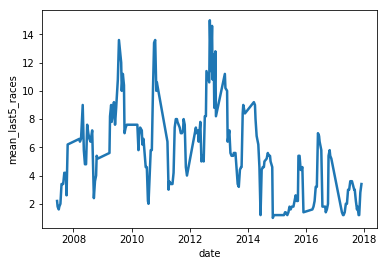

In [385]:
lineplot_last5races(work_df,'hamilton')

In [396]:
def displot_wins(df,driver_name):
    df = df[df['driverRef'] == driver_name]
    return sns.distplot(df['positionOrder'],bins=50)

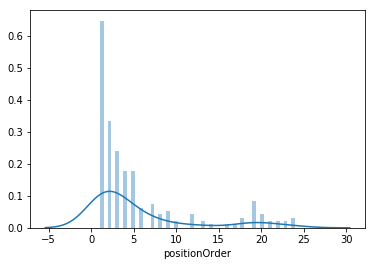

In [397]:
displot_wins(work_df,'hamilton')

In [122]:
# use args to plot multiple drivers
def total_wins_plot(df, driver_name):
    df = df[df['driverRef'] == driver_name]
    return sns.lineplot(x=df['date'],y=df['total_wins'], palette="tab10", linewidth=2.5)

DataError: No numeric types to aggregate

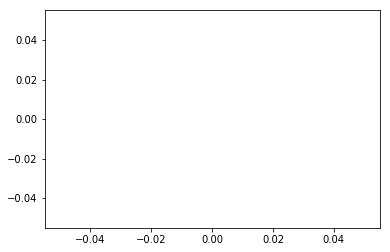

In [130]:
total_wins_plot(work_df,'hamilton')

In [133]:
df1 = pd.DataFrame({
    'driver': ['hamilton','vettel','webber','alonso'],
    'wins': [10,8,3,9]  
})

In [134]:
df1

,driver,wins
0,hamilton,10
1,vettel,8
2,webber,3
3,alonso,9


In [177]:
def get_total_wins(df, *drivernames):
    for driver in drivernames:
        print(driver)
        print(df[df['driver'] == driver]['wins'])
        print(f"{driver} has won in total {df[df['driver'] == driver]['wins'].item()}")

In [178]:
get_total_wins(df1, 'hamilton','alonso')

hamilton
0    10
Name: wins, dtype: int64
hamilton has won in total 10
alonso
3    9
Name: wins, dtype: int64
alonso has won in total 9


In [170]:
df1

,driver,wins
0,hamilton,10
1,vettel,8
2,webber,3
3,alonso,9


# Get all combinations: self merge with outer

In [36]:
df1 = pd.DataFrame({
    'race': [1, 1, 1, 1],
    'driver': list('abcd'),
    'ranking': range(1, 5)
})

print(df1)

df2 = df1.copy()

print(df1.merge(df2, on='race', how='outer'))

   race driver  ranking
0     1      a        1
1     1      b        2
2     1      c        3
3     1      d        4
    race driver_x  ranking_x driver_y  ranking_y
0      1        a          1        a          1
1      1        a          1        b          2
2      1        a          1        c          3
3      1        a          1        d          4
4      1        b          2        a          1
5      1        b          2        b          2
6      1        b          2        c          3
7      1        b          2        d          4
8      1        c          3        a          1
9      1        c          3        b          2
10     1        c          3        c          3
11     1        c          3        d          4
12     1        d          4        a          1
13     1        d          4        b          2
14     1        d          4        c          3
15     1        d          4        d          4


In [ ]:
# Filter out waar coureurId == coureurId

In [37]:
work_df.head()

,raceId,driverId,constructorId,grid,position,positionOrder,driverRef,year,circuitId,name,date,mean_position_till_date,mean_position__percircuit_till_date,result_previous_race,mean_last5_races,win,win_per_circuit,pole,poles_per_circuit,total_wins,total_poles,podium,total_podiums,podium_per_circuit,current_age_years,career_years,dnf,dnf_last5
6002,833,642,51,1,1.0,1,farina,1950,9,British Grand Prix,1950-05-13,NaN,NaN,NaN,NaN,True,NaN,True,NaN,NaN,NaN,True,NaN,NaN,43.535459,0,False,NaN
6003,833,686,51,4,3.0,3,reg_parnell,1950,9,British Grand Prix,1950-05-13,NaN,NaN,NaN,NaN,False,NaN,False,NaN,NaN,NaN,True,NaN,NaN,38.864590,0,False,NaN
6004,833,786,51,2,2.0,2,fagioli,1950,9,British Grand Prix,1950-05-13,NaN,NaN,NaN,NaN,False,NaN,False,NaN,NaN,NaN,True,NaN,NaN,NaN,0,False,NaN
11301,833,640,105,8,NaN,17,graffenried,1950,9,British Grand Prix,1950-05-13,NaN,NaN,NaN,NaN,False,NaN,False,NaN,NaN,NaN,False,NaN,NaN,35.987050,0,True,NaN
11302,833,747,105,18,NaN,15,murray,1950,9,British Grand Prix,1950-05-13,NaN,NaN,NaN,NaN,False,NaN,False,NaN,NaN,NaN,False,NaN,NaN,40.373177,0,True,NaN


In [38]:
def create_mergeself(df):
    df1 = df.copy()
    return df.merge(df1, on='raceId', how='outer')

In [39]:
work_df.shape

(23777, 28)

In [40]:
df_combi = create_mergeself(work_df)

In [41]:
df_combi.shape

(603077, 55)

In [44]:
df_combi.head()

,raceId,driverId_x,constructorId_x,grid_x,position_x,positionOrder_x,driverRef_x,year_x,circuitId_x,name_x,date_x,mean_position_till_date_x,mean_position__percircuit_till_date_x,result_previous_race_x,mean_last5_races_x,win_x,win_per_circuit_x,pole_x,poles_per_circuit_x,total_wins_x,total_poles_x,podium_x,total_podiums_x,podium_per_circuit_x,current_age_years_x,career_years_x,dnf_x,dnf_last5_x,driverId_y,constructorId_y,grid_y,position_y,positionOrder_y,driverRef_y,year_y,circuitId_y,name_y,date_y,mean_position_till_date_y,mean_position__percircuit_till_date_y,result_previous_race_y,mean_last5_races_y,win_y,win_per_circuit_y,pole_y,poles_per_circuit_y,total_wins_y,total_poles_y,podium_y,total_podiums_y,podium_per_circuit_y,current_age_years_y,career_years_y,dnf_y,dnf_last5_y
0,833,642,51,1,1.0,1,farina,1950,9,British Grand Prix,1950-05-13,NaN,NaN,NaN,NaN,True,NaN,True,NaN,NaN,NaN,True,NaN,NaN,43.535459,0,False,NaN,642,51,1,1.0,1,farina,1950,9,British Grand Prix,1950-05-13,NaN,NaN,NaN,NaN,True,NaN,True,NaN,NaN,NaN,True,NaN,NaN,43.535459,0,False,NaN
1,833,642,51,1,1.0,1,farina,1950,9,British Grand Prix,1950-05-13,NaN,NaN,NaN,NaN,True,NaN,True,NaN,NaN,NaN,True,NaN,NaN,43.535459,0,False,NaN,686,51,4,3.0,3,reg_parnell,1950,9,British Grand Prix,1950-05-13,NaN,NaN,NaN,NaN,False,NaN,False,NaN,NaN,NaN,True,NaN,NaN,38.864590,0,False,NaN
2,833,642,51,1,1.0,1,farina,1950,9,British Grand Prix,1950-05-13,NaN,NaN,NaN,NaN,True,NaN,True,NaN,NaN,NaN,True,NaN,NaN,43.535459,0,False,NaN,786,51,2,2.0,2,fagioli,1950,9,British Grand Prix,1950-05-13,NaN,NaN,NaN,NaN,False,NaN,False,NaN,NaN,NaN,True,NaN,NaN,NaN,0,False,NaN
3,833,642,51,1,1.0,1,farina,1950,9,British Grand Prix,1950-05-13,NaN,NaN,NaN,NaN,True,NaN,True,NaN,NaN,NaN,True,NaN,NaN,43.535459,0,False,NaN,640,105,8,NaN,17,graffenried,1950,9,British Grand Prix,1950-05-13,NaN,NaN,NaN,NaN,False,NaN,False,NaN,NaN,NaN,False,NaN,NaN,35.987050,0,True,NaN
4,833,642,51,1,1.0,1,farina,1950,9,British Grand Prix,1950-05-13,NaN,NaN,NaN,NaN,True,NaN,True,NaN,NaN,NaN,True,NaN,NaN,43.535459,0,False,NaN,747,105,18,NaN,15,murray,1950,9,British Grand Prix,1950-05-13,NaN,NaN,NaN,NaN,False,NaN,False,NaN,NaN,NaN,False,NaN,NaN,40.373177,0,True,NaN


In [46]:
df_combi[(df_combi['driverId_x'] != df_combi['driverId_y'])]

,raceId,driverId_x,constructorId_x,grid_x,position_x,positionOrder_x,driverRef_x,year_x,circuitId_x,name_x,date_x,mean_position_till_date_x,mean_position__percircuit_till_date_x,result_previous_race_x,mean_last5_races_x,win_x,win_per_circuit_x,pole_x,poles_per_circuit_x,total_wins_x,total_poles_x,podium_x,total_podiums_x,podium_per_circuit_x,current_age_years_x,career_years_x,dnf_x,dnf_last5_x,driverId_y,constructorId_y,grid_y,position_y,positionOrder_y,driverRef_y,year_y,circuitId_y,name_y,date_y,mean_position_till_date_y,mean_position__percircuit_till_date_y,result_previous_race_y,mean_last5_races_y,win_y,win_per_circuit_y,pole_y,poles_per_circuit_y,total_wins_y,total_poles_y,podium_y,total_podiums_y,podium_per_circuit_y,current_age_years_y,career_years_y,dnf_y,dnf_last5_y
1,833,642,51,1,1.0,1,farina,1950,9,British Grand Prix,1950-05-13,NaN,NaN,NaN,NaN,True,NaN,True,NaN,NaN,NaN,True,NaN,NaN,43.535459,0,False,NaN,686,51,4,3.0,3,reg_parnell,1950,9,British Grand Prix,1950-05-13,NaN,NaN,NaN,NaN,False,NaN,False,NaN,NaN,NaN,True,NaN,NaN,38.864590,0,False,NaN
2,833,642,51,1,1.0,1,farina,1950,9,British Grand Prix,1950-05-13,NaN,NaN,NaN,NaN,True,NaN,True,NaN,NaN,NaN,True,NaN,NaN,43.535459,0,False,NaN,786,51,2,2.0,2,fagioli,1950,9,British Grand Prix,1950-05-13,NaN,NaN,NaN,NaN,False,NaN,False,NaN,NaN,NaN,True,NaN,NaN,NaN,0,False,NaN
3,833,642,51,1,1.0,1,farina,1950,9,British Grand Prix,1950-05-13,NaN,NaN,NaN,NaN,True,NaN,True,NaN,NaN,NaN,True,NaN,NaN,43.535459,0,False,NaN,640,105,8,NaN,17,graffenried,1950,9,British Grand Prix,1950-05-13,NaN,NaN,NaN,NaN,False,NaN,False,NaN,NaN,NaN,False,NaN,NaN,35.987050,0,True,NaN
4,833,642,51,1,1.0,1,farina,1950,9,British Grand Prix,1950-05-13,NaN,NaN,NaN,NaN,True,NaN,True,NaN,NaN,NaN,True,NaN,NaN,43.535459,0,False,NaN,747,105,18,NaN,15,murray,1950,9,British Grand Prix,1950-05-13,NaN,NaN,NaN,NaN,False,NaN,False,NaN,NaN,NaN,False,NaN,NaN,40.373177,0,True,NaN
5,833,642,51,1,1.0,1,farina,1950,9,British Grand Prix,1950-05-13,NaN,NaN,NaN,NaN,True,NaN,True,NaN,NaN,NaN,True,NaN,NaN,43.535459,0,False,NaN,785,126,17,NaN,16,crossley,1950,9,British Grand Prix,1950-05-13,NaN,NaN,NaN,NaN,False,NaN,False,NaN,NaN,NaN,False,NaN,NaN,29.005387,0,True,NaN
6,833,642,51,1,1.0,1,farina,1950,9,British Grand Prix,1950-05-13,NaN,NaN,NaN,NaN,True,NaN,True,NaN,NaN,NaN,True,NaN,NaN,43.535459,0,False,NaN,589,105,11,NaN,18,chiron,1950,9,British Grand Prix,1950-05-13,NaN,NaN,NaN,NaN,False,NaN,False,NaN,NaN,NaN,False,NaN,NaN,NaN,0,True,NaN
7,833,642,51,1,1.0,1,farina,1950,9,British Grand Prix,1950-05-13,NaN,NaN,NaN,NaN,True,NaN,True,NaN,NaN,NaN,True,NaN,NaN,43.535459,0,False,NaN,627,154,9,5.0,5,rosier,1950,9,British Grand Prix,1950-05-13,NaN,NaN,NaN,NaN,False,NaN,False,NaN,NaN,NaN,False,NaN,NaN,44.518368,0,False,NaN
8,833,642,51,1,1.0,1,farina,1950,9,British Grand Prix,1950-05-13,NaN,NaN,NaN,NaN,True,NaN,True,NaN,NaN,NaN,True,NaN,NaN,43.535459,0,False,NaN,704,154,6,4.0,4,cabantous,1950,9,British Grand Prix,1950-05-13,NaN,NaN,NaN,NaN,False,NaN,False,NaN,NaN,NaN,False,NaN,NaN,45.594365,0,False,NaN
9,833,642,51,1,1.0,1,farina,1950,9,British Grand Prix,1950-05-13,NaN,NaN,NaN,NaN,True,NaN,True,NaN,NaN,NaN,True,NaN,NaN,43.535459,0,False,NaN,661,151,10,NaN,20,peter_walker,1950,9,British Grand Prix,1950-05-13,NaN,NaN,NaN,NaN,False,NaN,False,NaN,NaN,NaN,False,NaN,NaN,37.596939,0,True,NaN
10,833,642,51,1,1.0,1,farina,1950,9,British Grand Prix,1950-05-13,NaN,NaN,NaN,NaN,True,NaN,True,NaN,NaN,NaN,True,NaN,NaN,43.535459,0,False,NaN,666,151,10,NaN,20,rolt,1950,9,British Grand Prix,1950-05-13,NaN,NaN,NaN,NaN,False,NaN,False,NaN,NaN,NaN,False,NaN,NaN,31.573544,0,True,NaN


In [13]:
new_workf_df.loc[new_workf_df['driverRef_x']!=new_workf_df['driverRef_y']]

,driverId,constructorId_x,grid_x,position_x,positionOrder_x,driverRef_x,year_x,circuitId_x,name_x,date_x,mean_position_till_date_x,mean_position__percircuit_till_date_x,result_previous_race_x,mean_last5_races_x,win_x,win_per_circuit_x,pole_x,poles_per_circuit_x,total_wins_x,total_poles_x,podium_x,total_podiums_x,podium_per_circuit_x,current_age_years_x,career_years_x,dnf_x,dnf_last5_x,constructorId_y,grid_y,position_y,positionOrder_y,driverRef_y,year_y,circuitId_y,name_y,date_y,mean_position_till_date_y,mean_position__percircuit_till_date_y,result_previous_race_y,mean_last5_races_y,win_y,win_per_circuit_y,pole_y,poles_per_circuit_y,total_wins_y,total_poles_y,podium_y,total_podiums_y,podium_per_circuit_y,current_age_years_y,career_years_y,dnf_y,dnf_last5_y


In [ ]:
df.loc[df['column_name'] != some_value]